In [293]:
#load libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [361]:
#open twiss.out and read line by line, store each line as a string in a list
filename = "madx_scripts/BC.out"
copy_lines=[]
with open(filename) as f: #open and read the file
    lines = f.readlines()
for line in lines: 
    split_line = line.split() #split lines into words
    copy_lines.append(split_line)

#just declaring a list for each column
name,type,s,L,betx,alfx,Dx,bety,alfy,Dy,angle,K1L = [],[],[],[],[],[],[],[],[],[],[],[]

#from each line, extract a name/number and append it into its relevant column
for i in range(52,len(copy_lines)-1): #53rd line in the file is the first relevant one
    line = copy_lines[i]
    name.append(line[0])
    type.append(line[1])
    s.append(float(line[2]))
    L.append(float(line[3]))
    betx.append(float(line[4]))
    alfx.append(float(line[5]))
    Dx.append(float(line[6]))
    bety.append(float(line[7]))
    alfy.append(float(line[8]))
    Dy.append(float(line[9]))
    angle.append(float(line[10]))
    K1L.append(float(line[11]))

#create a dataframe that will contain all important info - name of place in an LHC sequence, beta functions, phases, fields, etc... of the UNPERTURBED version
d_transfer = {'name': name, 'type':type, 's': s, 'L':L, 'BETX': betx, 'ALFX':alfx, 'DX': Dx, 'BETY': bety, 'ALFY':alfy, 'DY': Dy, 'ANGLE':angle}
df_tr = pd.DataFrame(data=d_transfer) #df is the UNPERTURBED (model) version of twiss parameters
df_tr.head() #show header of the dataframe

,name,type,s,L,BETX,ALFX,DX,BETY,ALFY,DY,ANGLE
0,"""BC_LINE$START""","""MARKER""",0.000000,0.000000,8.00000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000
1,"""DEL2L2_BC_D0""","""DRIFT""",2.000000,2.000000,8.50000,-0.250000,0.000000,8.500000,-0.250000,0.0,0.000000
2,"""CAV_BC_1""","""RFCAVITY""",3.000000,1.000000,9.12500,-0.375000,0.000000,9.125000,-0.375000,0.0,0.000000
3,"""DEL2L2_BC_D1""","""DRIFT""",5.200000,2.200000,11.38000,-0.650000,0.000000,11.380000,-0.650000,0.0,0.000000
4,"""BEL2L2_BC_B1""","""RBEND""",8.234545,3.034545,16.19675,-1.012222,0.776457,12.953324,0.204269,0.0,0.523599


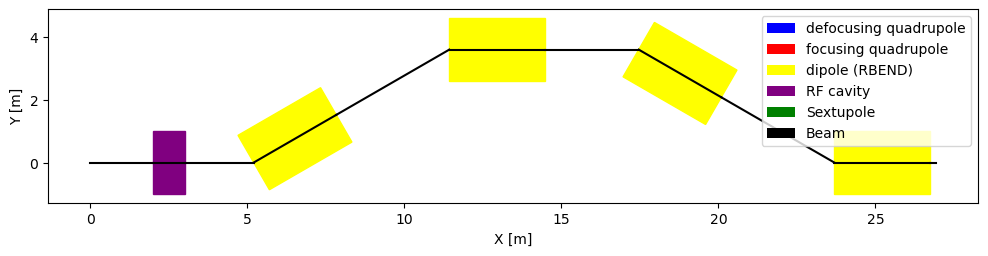

In [362]:
fig, ax = plt.subplots(figsize=(12, 8))
angle_tot=0 #cumulative total angle, needs to add up to 2pi after one turn
x_global,y_global=0,0 #global position in lab frame (not courant-snyder)
elem_width = 2 #width of an element for plotting in 2D
beam_width = 0.1
for type_,s_,L_,K1L_,angle_ in zip(type,s,L,K1L,angle): #for each element, plot a rectangular patch in lab frame
    x=x_global #update local coordinate
    y=y_global
    if 'QUADRUPOLE' in type_:
        if K1L_<0: #if defocusing
            ax.add_patch(Rectangle((x, y-elem_width/2), L_, elem_width,angle=180*angle_tot/np.pi,color='blue'))
        else: #if focusing
            ax.add_patch(Rectangle((x, y-elem_width/2), L_, elem_width,angle=180*angle_tot/np.pi,color='red'))
    elif 'RFCAVITY' in type_:
        ax.add_patch(Rectangle((x, y-elem_width/2), L_, elem_width,angle=180*angle_tot/np.pi,color='purple'))
    elif 'RBEND' in type_:
       ax.add_patch(Rectangle((x, y), L_, elem_width/2,angle=180*(angle_tot+angle_)/np.pi,color='yellow')) #left dipole patch
       ax.add_patch(Rectangle((x, y), L_, -elem_width/2,angle=180*(angle_tot+angle_)/np.pi,color='yellow')) #right dipole patch
    elif 'SEXTUPOLE' in type_:
        ax.add_patch(Rectangle((x, y-elem_width/2), L_, elem_width,angle=180*angle_tot/np.pi,color='green'))
    #ax.add_patch(Rectangle((x, y-beam_width/2), L_, beam_width,angle=180*angle_tot/np.pi,color='black'))
    x_global+=L_*np.cos((angle_tot+angle_))#update global (starting) position for the next element
    y_global+=L_*np.sin((angle_tot+angle_))
    plt.plot([x,x_global],[y,y_global],color='black') #draw a line for the beam
    angle_tot += angle_ #update cumulative angle (in radians)

#plt.xlim(-270,-245)
#plt.ylim(-2,6)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
ax = plt.gca() #handle needed to fix aspect ratio of the plot (to preserve angles!)
ax.set_aspect(1) #fix aspect ratio

hndl = [Patch(facecolor='blue', label='defocusing quadrupole'),#make a legend corresponding to the color patches signifying lattice elements
        Patch(facecolor='red', label='focusing quadrupole'),
        Patch(facecolor='yellow', label='dipole (RBEND)'),
        Patch(facecolor='purple', label='RF cavity'),
        Patch(facecolor='green', label='Sextupole'),
        Patch(facecolor='black', label='Beam')]
ax.legend(handles=hndl,loc='upper right')
plt.savefig('jupyter_plots/Transfer_lattice.jpg', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'D [m]')

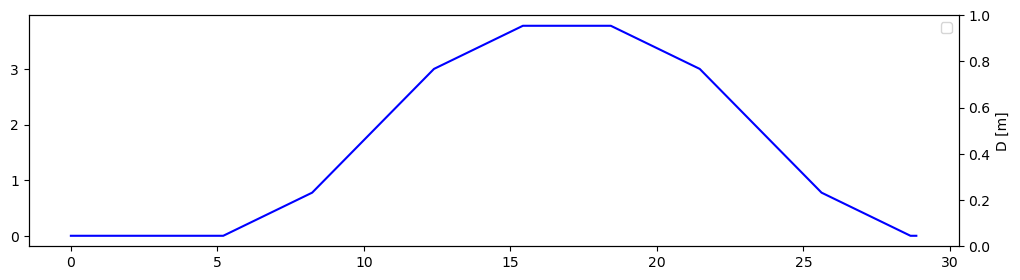

In [363]:
fig, ax1 = plt.subplots(figsize=(12,3))
ax2 = ax1.twinx()
ax1.plot(s,Dx, 'b',label='Dx [horizontal]')
#ax2.plot(s,betx, 'r',label=r'$\beta_x$ [horizontal]')
plt.legend(loc="upper right")
plt.xlabel('s [m]')
plt.ylabel('D [m]')
#plt.xlim(509.6,520)

Text(0, 0.5, 'Alfa')

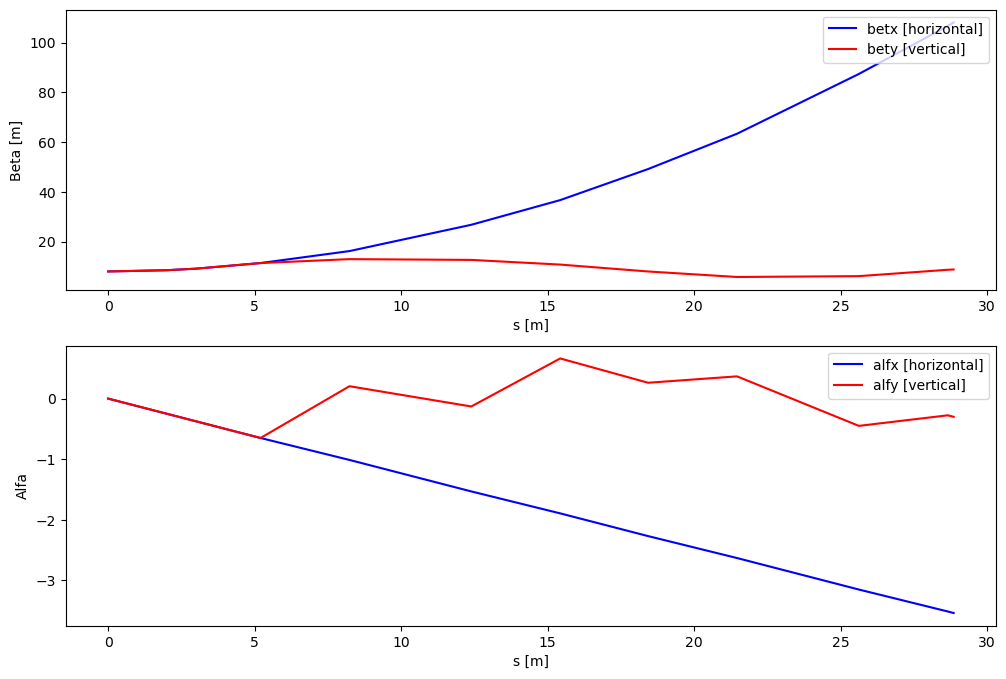

In [364]:
fig, (plt1, plt2) = plt.subplots(2, 1, figsize=(12, 8))
plt1.plot(s,betx, 'b',label='betx [horizontal]')
plt1.plot(s,bety, 'r',label='bety [vertical]')
plt1.legend(loc="upper right")
plt1.set_xlabel('s [m]')
plt1.set_ylabel('Beta [m]')

plt2.plot(s,alfx, 'b',label='alfx [horizontal]')
plt2.plot(s,alfy, 'r',label='alfy [vertical]')
plt2.legend(loc="upper right")
plt2.set_xlabel('s [m]')
plt2.set_ylabel('Alfa')

In [407]:
filename = "madx_scripts/tracking_data/BC_track.outone"
copy_lines=[]
with open(filename) as f: #open and read the file
    lines = f.readlines()
for line in lines: 
    split_line = line.split() #split lines into words
    copy_lines.append(split_line)

segment_count=0
#from each line, extract a name/number and append it into its relevant column
for i in range(52,len(copy_lines)-1): #53rd line in the file is the first relevant one
    line = copy_lines[i]
    if ("segment" in line[0]):
        n_parts = int(line[3])
        seg_num = int(line[1])
        segment_count+=1
        if segment_count == 1:
            segm_list = copy_lines[i+1:i+1+n_parts]
            x_0 =  np.array([float(row[2]) for row in segm_list])
            px_0 = np.array([float(row[3]) for row in segm_list])
            y_0 =  np.array([float(row[4]) for row in segm_list])
            py_0 = np.array([float(row[5]) for row in segm_list])
            T_0 =  np.array([float(row[6]) for row in segm_list])
            PT_0 = np.array([float(row[7]) for row in segm_list])
        elif segment_count == 2:
            segm_list = copy_lines[i+1:i+1+n_parts]
            x =  np.array([float(row[2]) for row in segm_list])
            px = np.array([float(row[3]) for row in segm_list])
            y =  np.array([float(row[4]) for row in segm_list])
            py = np.array([float(row[5]) for row in segm_list])
            T =  np.array([float(row[6]) for row in segm_list])
            PT = np.array([float(row[7]) for row in segm_list])
        elif segment_count == 3:
            segm_list = copy_lines[i+1:i+1+n_parts]
            x_e =  np.array([float(row[2]) for row in segm_list])
            px_e = np.array([float(row[3]) for row in segm_list])
            y_e =  np.array([float(row[4]) for row in segm_list])
            py_e = np.array([float(row[5]) for row in segm_list])
            T_e =  np.array([float(row[6]) for row in segm_list])
            PT_e = np.array([float(row[7]) for row in segm_list])

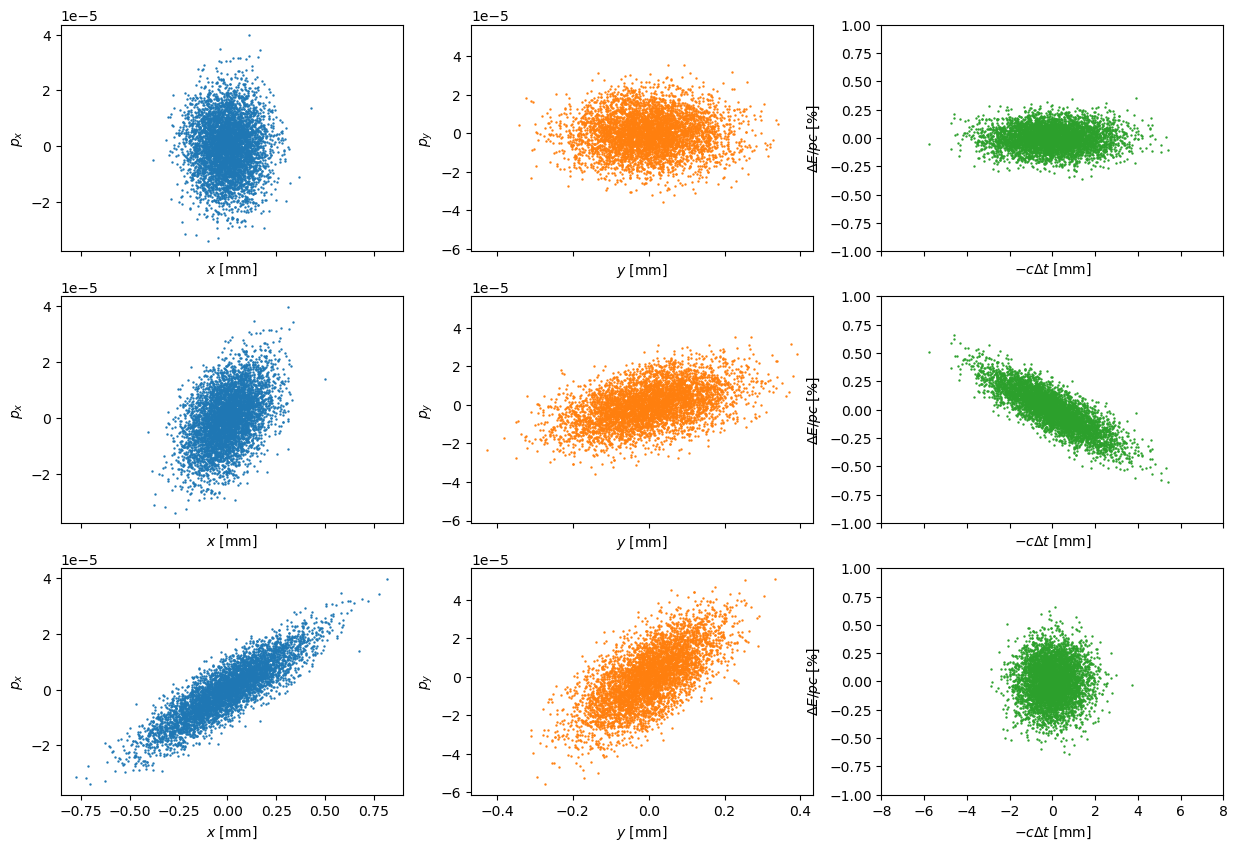

In [408]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,10),sharex='col',sharey='col')
m_s=0.5 #markersize andle
x_color = 'tab:blue'
y_color = 'tab:orange'
t_color = 'tab:green'

ax[0,0].scatter(x_0*1e3,px_0,s=m_s,color=x_color)
ax[1,0].scatter(x*1e3,px,s=m_s,color=x_color)
ax[2,0].scatter(x_e*1e3,px_e,s=m_s,color=x_color)

ax[0,1].scatter(y_0*1e3,py_0,s=m_s,color=y_color)
ax[1,1].scatter(y*1e3,py,s=m_s,color=y_color)
ax[2,1].scatter(y_e*1e3,py_e,s=m_s,color=y_color)

ax[0,2].scatter(T_0*1e3,PT_0*100,s=m_s,color=t_color)
ax[1,2].scatter(T*1e3,PT*100,s=m_s,color=t_color)
ax[2,2].scatter(T_e*1e3,PT_e*100,s=m_s,color=t_color)

ax[0,2].set_xlim(-8,8)
ax[0,2].set_ylim(-1,1)

for i in range(3):
    ax[i,0].set_xlabel(r"$x$ [mm]")
    ax[i,0].set_ylabel(r"$p_x$")
    ax[i,1].set_xlabel(r"$y$ [mm]")
    ax[i,1].set_ylabel(r"$p_y$")
    ax[i,2].set_xlabel(r"$-c\Delta t$ [mm]")
    ax[i,2].set_ylabel(r"$\Delta E/pc$ [%]")

plt.savefig('jupyter_plots/phase_space_tracking.jpg', bbox_inches='tight')

